# Titanic Disaster Survival Prediction Problem
### Given a set of features of individual person in terms of age,fare,ticket,class,sex,embarked etc, we have to predict whether that person would survive or not in the disaster using a set of pre-labelled example.

#### Importing various necessary modules.

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#### Reading the input traing data which is saved as a .csv file in current directory under "train.csv". The dataset could also be found in kaggle.com under the link "https://www.kaggle.com/datasets"

In [187]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### The characteristics of input data which is stored in the variable called "train".

In [151]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.shape

(891, 12)

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### The number of people who survived the disaster. the count of people survived(characterized by value 1 in 'Survived' column) just over 300 people of total of around 891 people.   A countplot showing its distribution. 

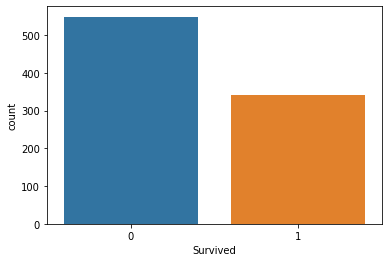

In [152]:
sns.countplot(train['Survived'])

#### The percentage of people survived.

In [188]:
count = sum(train['Survived'] == 1)
percentSurvived = (count/891)*100
print('percent survived: ',percentSurvived)

percent survived:  38.38383838383838


##### only around 39% of people survived in the disaster.

#### Checking for null values in 'train' data.

In [48]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Filling the null age values in 'train' data with average value of age (25).

In [88]:
train['Age'] = train['Age'].fillna(25)

In [189]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Visualising the distribution of people survived on the basis of 'Sex'

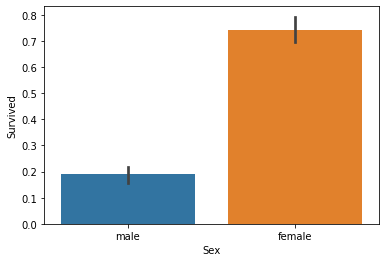

In [173]:
sns.barplot(x="Sex",y="Survived",data=train)

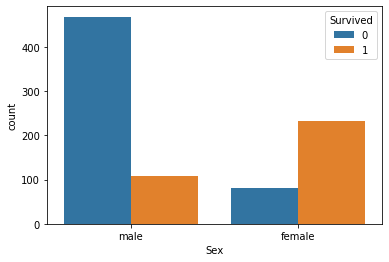

In [154]:
sns.countplot(x='Sex',hue='Survived',data=train)

##### Graph suggest that chances of surival is larger if you are a female. As most female survived the disaster.

#### Visualising the total number of people who were in differnt passenger classes. And visualising how many of them in each passenger class survived the disaster.

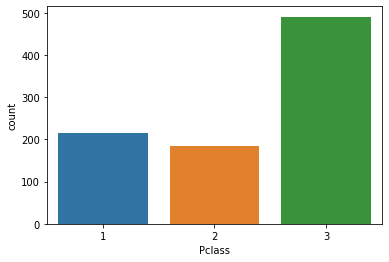

In [174]:
sns.countplot(x='Pclass',data=train)

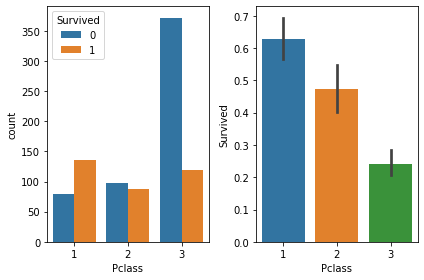

In [175]:
fig,axes = plt.subplots(1,2)
sns.countplot(x='Pclass',hue='Survived',data=train,ax=axes[0])
sns.barplot(x='Pclass',y='Survived',data=train,ax=axes[1])
plt.tight_layout()

##### The plots suggest that most people were of PClass 3 as it can be considered as general class while PClass 1 is for the elites. The plot also suggest that more percentage of people in PClass 1 survived  while very less fraction of people in PClass 3 survived.

#### Visualising the distribution of people survived on the basis of age.

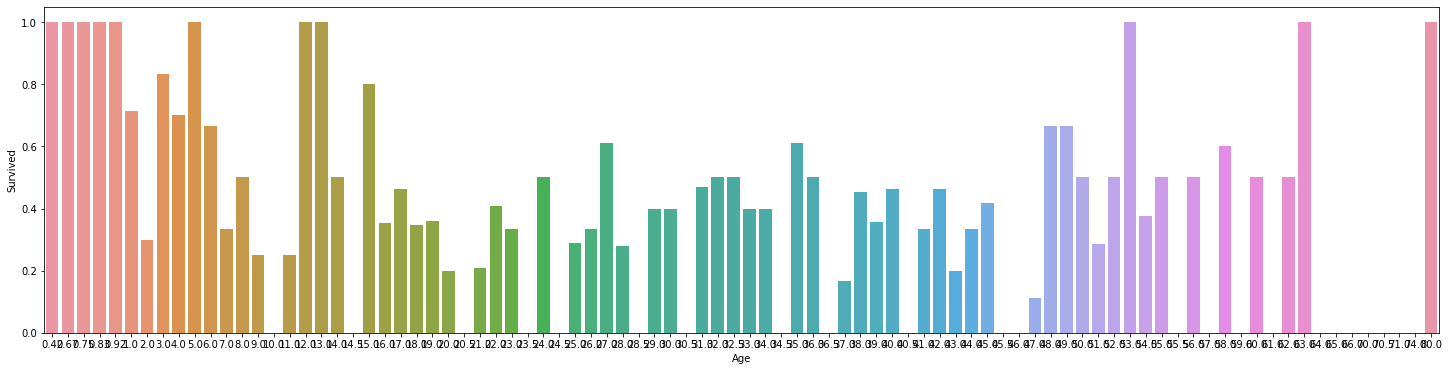

In [90]:
plt.figure(figsize=(25,6))
sns.barplot(train['Age'],train['Survived'],ci=None)

##### The plot suggest children had high rate of survival  while very few fraction of people in their mid 20 sand 30s survived.

#### Filling the null 'Embarked' values with 'S' as most people have 'S' Embarked values.

In [162]:
train['Embarked'] = train['Embarked'].fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Visualising the number and chances of survival of people based on thier 'Embarked' values.

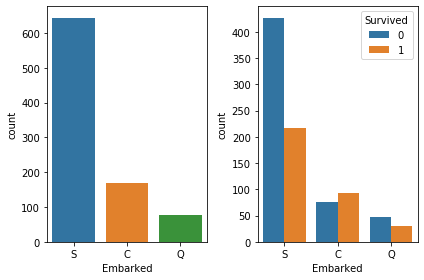

In [190]:
fig,axes = plt.subplots(1,2)
sns.countplot(x='Embarked',data=train,ax=axes[0])
sns.countplot(x='Embarked',hue='Survived',data=train,ax=axes[1])
plt.tight_layout()

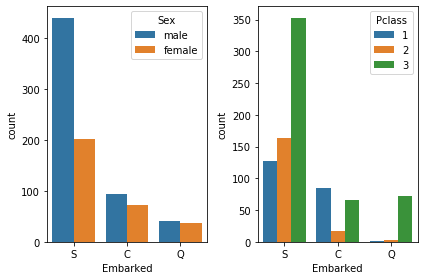

In [191]:
fig,axes = plt.subplots(1,2)
sns.countplot(x='Embarked',hue='Sex',data=train,ax=axes[0])
sns.countplot(x='Embarked',hue='Pclass',data=train,ax=axes[1])
plt.tight_layout()

##### The plot suggest most people had 'Embarked' value od 'S' and many first class passengers also had 'Embarked' value of 'S'  Thus 'Embarked' can be considered as an importamt feature.

#### Visualising survival rate and count of people based on SibSp and Parch Feature.

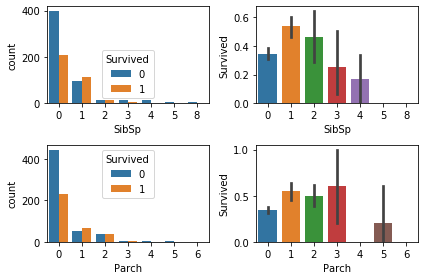

In [177]:
fig,axes = plt.subplots(2,2)
sns.countplot(x='SibSp',hue='Survived',data=train,ax=axes[0,0])
sns.barplot(x='SibSp',y='Survived',data=train,ax=axes[0,1])
sns.countplot(x='Parch',hue='Survived',data=train,ax=axes[1,0])
sns.barplot(x='Parch',y='Survived',data=train,ax=axes[1,1])
plt.tight_layout()

##### As not much could be said from these two features. Therefore a new feature is created 'FamilySize' that contains the sum of SibSp and Parch feature.   Its distribution is studied.

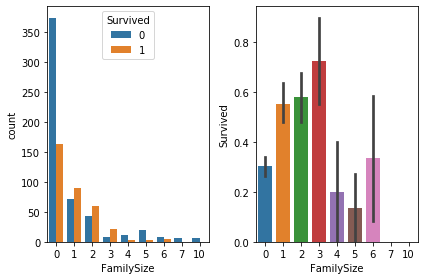

In [192]:
train['FamilySize'] = train['SibSp']+train['Parch']
fig,axes = plt.subplots(1,2)
sns.countplot(x='FamilySize',hue='Survived',data=train,ax=axes[0])
sns.barplot(x='FamilySize',y='Survived',data=train,ax=axes[1])
plt.tight_layout()

##### Interestingly the survival rate is higher if you have 2-3 family members with you.

#### Studying the distribution of fare.

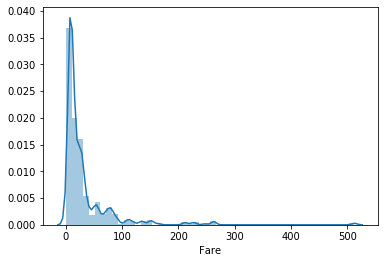

In [75]:
sns.distplot(train['Fare'])

##### Most people fare were around 30 dollars.  Some properties of fare feature.

In [76]:
train['Fare'].max()

512.3292

In [77]:
train['Fare'].min()

0.0

In [78]:
train['Fare'].mean()

32.2042079685746

#### Studying various survival rates of different fare types.

In [108]:
train['FareBin'] = pd.qcut(train['Fare'],5)
train.groupby(train['FareBin'])['Survived'].mean().to_frame()


,Survived
FareBin,
"(-0.001, 7.854]",0.217877
"(7.854, 10.5]",0.201087
"(10.5, 21.679]",0.424419
"(21.679, 39.688]",0.444444
"(39.688, 512.329]",0.642045


##### As we can see the more your fare is, more chances of your survival.

#### The differnt correlation between differnt features of training data.

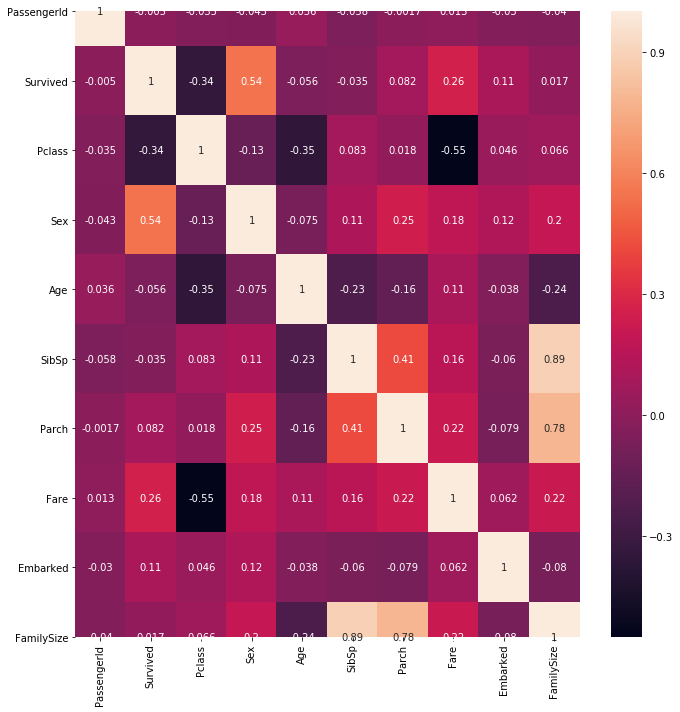

In [102]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.tight_layout()

### Converting categorical features to numerical values.

#### Converting Sex feature to numerical 0 or 1.

In [193]:
def toStr(var):
    #var = var.astype(str)
    if var=='male':
        return 0
    elif var=='female':
        return 1
    
    
train['Sex'] = train['Sex'].apply(toStr)

#### Converting Embarked feature to numerical 0 or 1 or 2.

In [194]:
def toNum(var):
    if var=='S':
        return 0
    elif var=='C':
        return 1
    elif var=='Q':
        return 2
    
train['Embarked'] = train['Embarked'].apply(toNum)

In [195]:
train['Embarked']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

#### Converting continuous 'Age' feature into differnt bins of age category.

In [196]:
train['Age_cat']=0
train.loc[train['Age']<=16,'Age_cat']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_cat']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_cat']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_cat']=3
train.loc[train['Age']>64,'Age_cat']=4


#### Converting continuous 'Fare' feature into differnt bins of fare category.

In [197]:
train['fare_cat']=0
train.loc[train['Fare']<=16,'fare_cat']=0
train.loc[(train['Fare']>16)&(train['Fare']<=32),'fare_cat']=1
train.loc[(train['Fare']>32)&(train['Fare']<=48),'fare_cat']=2
train.loc[(train['Fare']>48)&(train['Fare']<=64),'fare_cat']=3
train.loc[train['Fare']>64,'fare_cat']=4


In [198]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,2,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,2,0


#### Dropping redundant cloumns as they dont contribute in predictionfg the labels.
1. PassengerID
2. Name
3. Age
4. SibSp
5. Parch
6. Ticket
7. Fare
8. Cabin

In [204]:
train.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Embarked,FamilySize,Age_cat,fare_cat
0,0,3,0,0.0,1,1,0
1,1,1,1,1.0,1,2,4
2,1,3,1,0.0,0,1,0
3,1,1,1,0.0,1,2,3
4,0,3,0,0.0,0,2,0


#### Filling the missing 2 of 'Embarked values'. with most common occuring of them 'S' as 0.0

In [220]:
train.isnull().sum()
train['Embarked'] = train['Embarked'].fillna(0.0)

#### The new correaltion heatmap between new set of refined features.

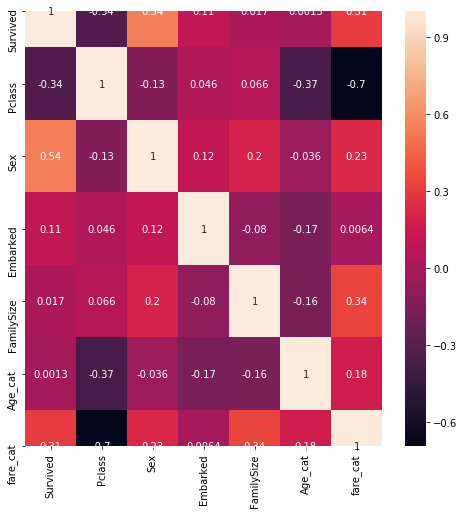

In [221]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True)

### Implementing various Scikit-learn models for classification process.

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Preparing the data for processing by splitting them into test and train along with separting features with labels.

In [ ]:
trn,test = train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
trn_X = trn[trn.columns[1:]]
trn_Y = trn[trn.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']

##### The features set.

In [224]:
X.head()

,Pclass,Sex,Embarked,FamilySize,Age_cat,fare_cat
0,3,0,0.0,1,1,0
1,1,1,1.0,1,2,4
2,3,1,0.0,0,1,0
3,1,1,0.0,1,2,3
4,3,0,0.0,0,2,0


#### The labels Set.

In [285]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### 1. Using Logistic Regression Model

In [227]:
model = LogisticRegression(C=0.05,solver='liblinear')
model.fit(trn_X,trn_Y.values.ravel())
pred = model.predict(test_X)
acc = metrics.accuracy_score(pred,test_Y)
print(acc)

0.7985074626865671


##### The accuracy came out to be around 79.85%

### 2. Using Gaussian Naive Bayes Model.

In [228]:
model = GaussianNB()
model.fit(trn_X,trn_Y.values.ravel())
pred = model.predict(test_X)
acc = metrics.accuracy_score(pred,test_Y)
print(acc)

0.7910447761194029


##### The accuracy came out to be around 79.10%

### 3. Using Random Forest ensemble Classifier.

In [275]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(trn_X,trn_Y.values.ravel())
pred = model1.predict(test_X)
acc = metrics.accuracy_score(pred,test_Y)
print(acc)

0.7985074626865671


##### The accuracy came out to be around 79%.

### 3. Using Decision Tree Classifier.

In [231]:
model = DecisionTreeClassifier()
model.fit(trn_X,trn_Y.values.ravel())
pred = model.predict(test_X)
acc = metrics.accuracy_score(pred,test_Y)
print(acc)

0.7873134328358209


##### The accuracy came out to be around 78.73%.

### So the best  model to fit the above data turned out to be Random forest Ensemble Classifier.  So we name it model1.

### Finding out the cross validation score and prediction of above classifiers.

In [232]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10,random_state=22)
xyz = []
std = []
accuracy = []
classifier = ['Logistic Regression','Naive Bayes','Decision Tree','Random Forest']
models = [LogisticRegression(solver='liblinear'),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
model_DataFrame = pd.DataFrame({'CV Mean':xyz,'CV Std':std},index=classifier)
model_DataFrame

,CV Mean,CV Std
Logistic Regression,0.785643,0.025261
Naive Bayes,0.775568,0.029839
Decision Tree,0.802497,0.030436
Random Forest,0.811448,0.033625


#### Building confusuon matrix for all types of classifiers used.

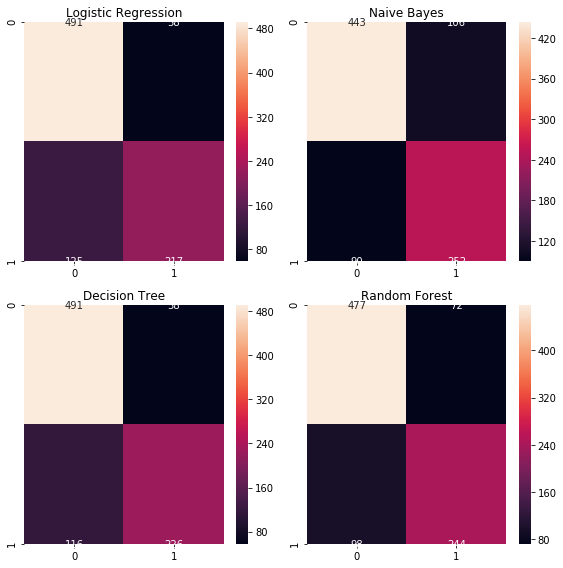

In [238]:
f,ax = plt.subplots(2,2,figsize=(8,8))
y_pred = cross_val_predict(LogisticRegression(C=0.05,solver='liblinear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Logistic Regression')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Naive Bayes')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Decision Tree')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Random Forest')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()

### The above confusion matrix suggests that Random forest classifier works best with the above data and after it decision tree provides best model.

### Preparing the testing data to make prediction. in the same format as above training data.

In [260]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [261]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [262]:
test['Age'].fillna(28)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: Age, Length: 418, dtype: float64

In [263]:
test['Fare'].fillna(13)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [264]:
test['Age_cat']=0
test.loc[test['Age']<=16,'Age_cat']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_cat']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_cat']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_cat']=3
test.loc[test['Age']>64,'Age_cat']=4

In [265]:
test['Fare_cat']=0
test.loc[test['Fare']<=7.775,'Fare_cat']=0
test.loc[(test['Fare']>7.775)&(test['Fare']<=8.662),'Fare_cat']=1
test.loc[(test['Fare']>8.662)&(test['Fare']<=14.454),'Fare_cat']=2
test.loc[(test['Fare']>14.454)&(test['Fare']<=26.0),'Fare_cat']=3
test.loc[(test['Fare']>26.0)&(test['Fare']<=52.369),'Fare_cat']=4
test.loc[test['Fare']>52.369,'Fare_cat']=5

In [266]:
test['FamilySize'] = test['Parch'] + test['SibSp']

In [270]:
test.drop(['Name','Age','Ticket','Cabin','SibSp','Parch','Fare','PassengerId'],axis=1,inplace=True)

In [267]:
def toStr(var):
    #var = var.astype(str)
    if var=='male':
        return 0
    elif var=='female':
        return 1
    
    
test['Sex'] = test['Sex'].apply(toStr)
test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [268]:
def toNum(var):
    if var=='S':
        return 0
    elif var=='C':
        return 1
    elif var=='Q':
        return 2
    
test['Embarked'] = test['Embarked'].apply(toNum)
test['Embarked']

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int64

#### The pepared test data in required format.

In [271]:
test.head()

,Pclass,Sex,Embarked,Age_cat,Fare_cat,FamilySize
0,3,0,2,2,1,0
1,3,1,0,2,0,1
2,2,0,2,3,2,0
3,3,0,0,1,2,0
4,3,1,0,1,2,2


#### Using the random forest classifier model to predict on these test data and storing it in predictions.csv file as a result of prediction on unlabelled data.

In [284]:
pred = model1.predict(test)
index = np.arange(1,419)
pred_y = pd.DataFrame(index,pred)
pred_y.to_csv('predictions.csv')